<a href="https://colab.research.google.com/github/PeriaPreetiJ/Supermarket_Sales_Analysis/blob/main/Supermarket_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import matplotlib.ticker as ticker

In [32]:
data = pd.read_csv('/content/SampleSuperstore.csv', encoding='latin-1')

In [33]:
print(data.shape)
data.head()

(9994, 21)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0%,41.91
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0%,219.58
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0%,6.87
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,45%,-383.03
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,20%,2.52


In [34]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%m/%d/%Y')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], format='%m/%d/%Y')

In [35]:
data.sort_values(by=['Order Date'], inplace=True, ascending=True)
data['Order Year'] = data['Order Date'].dt.year
data['Order Month'] = data['Order Date'].dt.month
data['Order Quarter'] = data['Order Date'].dt.quarter
data.set_index(['Order Date','Order Year','Order Month','Order Quarter'], inplace=True)
data.reset_index(inplace=True)
data.set_index('Order Date', inplace=True)

In [36]:
print(data.isnull().sum())

Order Year       0
Order Month      0
Order Quarter    0
Row ID           0
Order ID         0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [30]:
data[data['Postal Code'].isna()][['City','State']].value_counts()

,,count
City,State,


**Most Valuable Customers**

In [37]:
# This just gets a list of the years represented by the date, which we'll use for plotting
years = list(set(data['Order Year'].values))

In [38]:
cat = 'Customer Name'
byyear = data[[cat,'Sales','Order Year']].groupby(['Order Year',cat]).sum().sort_values(['Order Year','Sales'], ascending=[True,False])
byyear.rename(columns={'Sales':'Total Sales'})
byyear = byyear.swaplevel().unstack()
byyear.columns = byyear.columns.droplevel(0)
byyear['Total'] = byyear.apply('sum',axis=1)
byyear = byyear.sort_values(['Total'], ascending=False)
top = byyear['Total'].head(10)

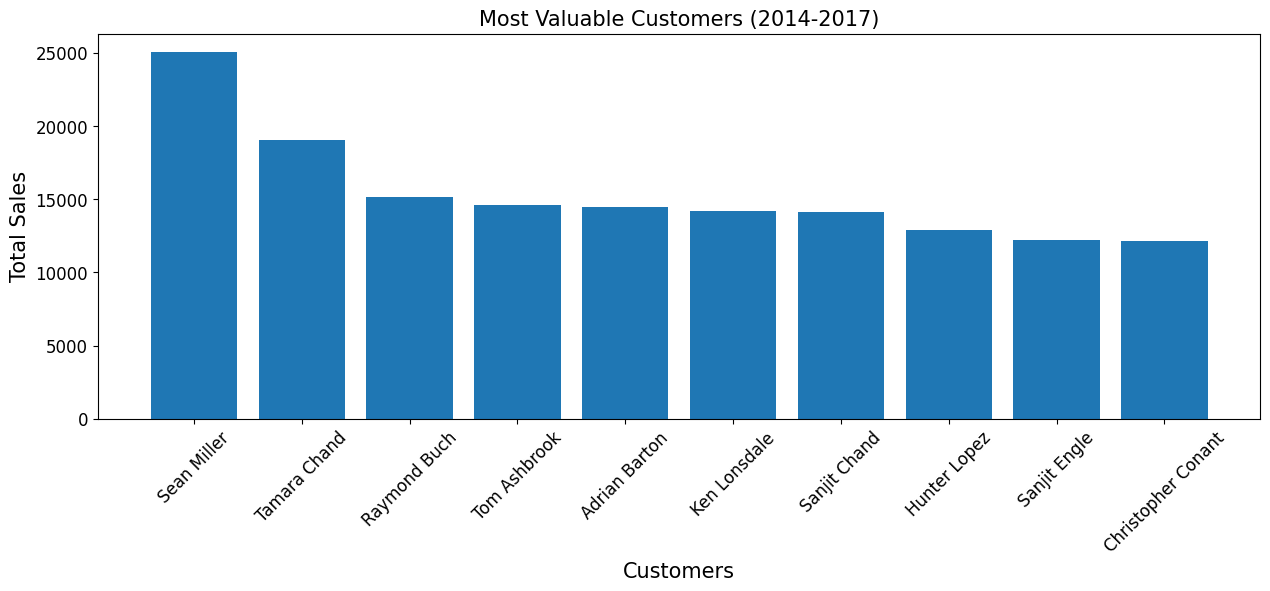

In [39]:
plt.figure(figsize = (15,5)) # width and height of figure is defined in inches
plt.title(f"Most Valuable Customers ({min(years)}-{max(years)})", fontsize=15)
plt.bar(top.index, top)
plt.xlabel("Customers", fontsize=15) # x axis shows the customers
plt.ylabel("Total Sales", fontsize=15) # y axis shows the Revenue
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12);

In [40]:
top = pd.DataFrame(top)
total = top['Total'].sum()
top['Percentage'] = top['Total']/total*100
print(top.head())
print('All Sales Revenue',f'${round(total,-1):1,.0f}')

                  Total  Percentage
Customer Name                      
Sean Miller    25043.07   16.281693
Tamara Chand   19052.22   12.386756
Raymond Buch   15117.35    9.828509
Tom Ashbrook   14595.62    9.489308
Adrian Barton  14473.57    9.409957
All Sales Revenue $153,810


**Most Valuable Segments**

The Most Valuable Segment is the one with the largest revenue again, and is between just a few general categories into which the products are grouped. We'll repeat the same type of analysis.

In [41]:
cat = 'Segment'
byyear = data[[cat,'Sales','Order Year']].groupby(['Order Year',cat]).sum().sort_values(['Order Year','Sales'], ascending=[True,False])
byyear.rename(columns={'Sales':'Total Sales'})
byyear = byyear.swaplevel().unstack()
byyear.columns = byyear.columns.droplevel(0)
byyear['Total'] = byyear.apply('sum',axis=1)
byyear = byyear.sort_values(['Total'], ascending=False)
top = byyear['Total'].head(10)

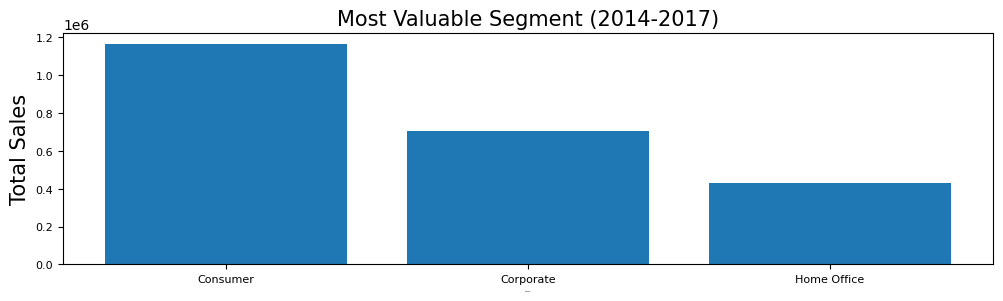

In [42]:
plt.figure(figsize = (12,3)) # width and height of figure is defined in inches
plt.title(f"Most Valuable Segment ({min(years)}-{max(years)})", fontsize=15)
plt.bar(top.index, top)
plt.xlabel("Segment", fontsize=1) # x axis shows the customers
plt.ylabel("Total Sales", fontsize=15) # y axis shows the Revenue
plt.xticks(fontsize=8)
plt.yticks(fontsize=8);

In [43]:
top = pd.DataFrame(top)
total = top['Total'].sum()
top['Percentage'] = top['Total']/total*100
print(top.head())
print('All Sales Revenue',f'${round(total,-1):1,.0f}')

                  Total  Percentage
Segment                            
Consumer     1161401.34   50.557235
Corporate     706146.44   30.739427
Home Office   429653.29   18.703338
All Sales Revenue $2,297,200


**Largest Contributions Geographically**

Let's take a look at which designations within each category have the biggest impact on sales. We can start with geographic analysis, looking at city, state, and region. We can break this down by year again, but visualize just the total over the period of time in which we are looking. We'll again follow the same steps as before, trading out the respective category.

**State**

In [44]:
cat = 'State'
byyear = data[[cat,'Sales','Order Year']].groupby(['Order Year',cat]).sum().sort_values(['Order Year','Sales'], ascending=[True,False])
byyear.rename(columns={'Sales':'Total Sales'})
byyear = byyear.swaplevel().unstack()
byyear.columns = byyear.columns.droplevel(0)
byyear['Total'] = byyear.apply('sum',axis=1)
byyear = byyear.sort_values(['Total'], ascending=False)
top = byyear['Total'].head(10)

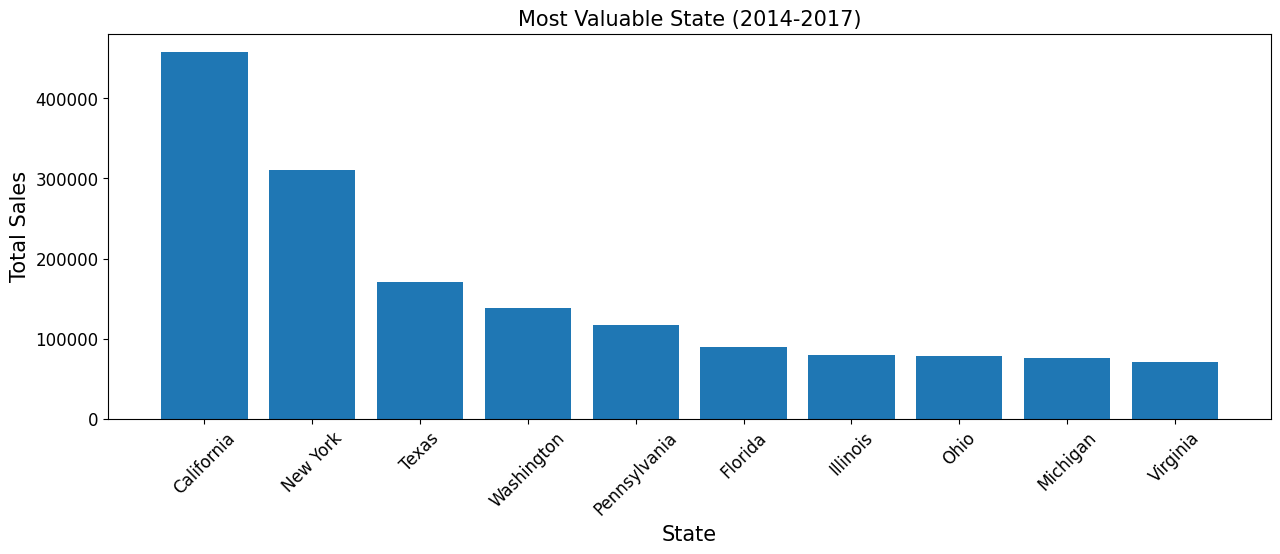

In [45]:
plt.figure(figsize = (15,5)) # width and height of figure is defined in inches
plt.title(f"Most Valuable {cat} ({min(years)}-{max(years)})", fontsize=15)
plt.bar(top.index, top)
plt.xlabel(f"{cat}", fontsize=15) # x axis shows the customers
plt.ylabel("Total Sales", fontsize=15) # y axis shows the Revenue
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12);

In [46]:
top = pd.DataFrame(top)
total = top['Total'].sum()
top['Percentage'] = top['Total']/total*100
print(top.head())
print('All Sales Revenue',f'${round(total,-1):1,.0f}')

                  Total  Percentage
State                              
California    457687.68   28.808769
New York      310876.20   19.567843
Texas         170187.98   10.712340
Washington    138641.29    8.726660
Pennsylvania  116512.02    7.333752
All Sales Revenue $1,588,710


In [47]:
bystate = byyear[['Total']]
bystate = bystate.rename_axis(None, axis=1)
bystate.sort_values(['State'], inplace=True)
bystate.reset_index(inplace=True)
bystate['Abbrev'] = state_df['State Code']

In [48]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(locations=bystate['Abbrev'],
                                   text=bystate['Abbrev'],
                                   z = bystate['Total'].astype(float),
                                   locationmode = 'USA-states',
                                   colorscale = 'Blues',
                                   colorbar_title = "Total"))
fig.update_layout(title_text='Total Sales by State', geo_scope='usa')
fig.show();

**City**

In [49]:
cat = 'City'
byyear = data[[cat,'Sales','Order Year']].groupby(['Order Year',cat]).sum().sort_values(['Order Year','Sales'], ascending=[True,False])
byyear.rename(columns={'Sales':'Total Sales'})
byyear = byyear.swaplevel().unstack()
byyear.columns = byyear.columns.droplevel(0)
byyear['Total'] = byyear.apply('sum',axis=1)
byyear = byyear.sort_values(['Total'], ascending=False)
top = byyear['Total'].head(10)

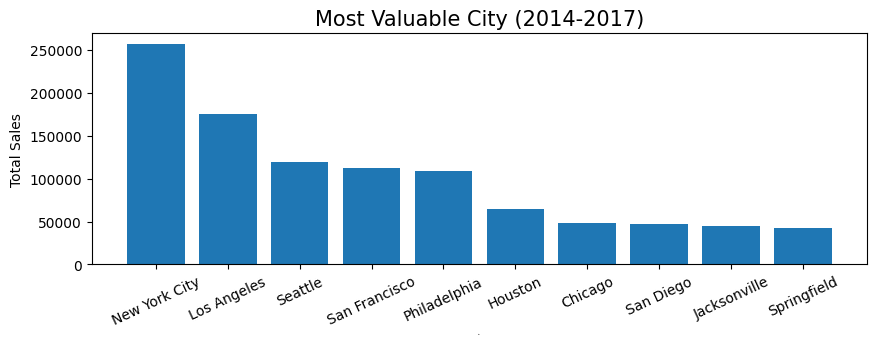

In [50]:
plt.figure(figsize = (10,3)) # width and height of figure is defined in inches
plt.title(f"Most Valuable {cat} ({min(years)}-{max(years)})", fontsize=15)
plt.bar(top.index, top)
plt.xlabel(f"{cat}", fontsize=1) # x axis shows the customers
plt.ylabel("Total Sales", fontsize=10) # y axis shows the Revenue
plt.xticks(fontsize=10, rotation=25)
plt.yticks(fontsize=10);

In [51]:
top = pd.DataFrame(top)
total = top['Total'].sum()
top['Percentage'] = top['Total']/total*100
print(top.head())
print('All Sales Revenue',f'${round(total,-1):1,.0f}')

                   Total  Percentage
City                                
New York City  256368.12   25.088889
Los Angeles    175851.33   17.209295
Seattle        119540.74   11.698586
San Francisco  112669.09   11.026107
Philadelphia   109077.09   10.674584
All Sales Revenue $1,021,840


**Region:**

In [52]:
cat = 'Region'
byyear = data[[cat,'Sales','Order Year']].groupby(['Order Year',cat]).sum().sort_values(['Order Year','Sales'], ascending=[True,False])
byyear.rename(columns={'Sales':'Total Sales'})
byyear = byyear.swaplevel().unstack()
byyear.columns = byyear.columns.droplevel(0)
byyear['Total'] = byyear.apply('sum',axis=1)
byyear = byyear.sort_values(['Total'], ascending=False)
top = byyear['Total'].head(10)

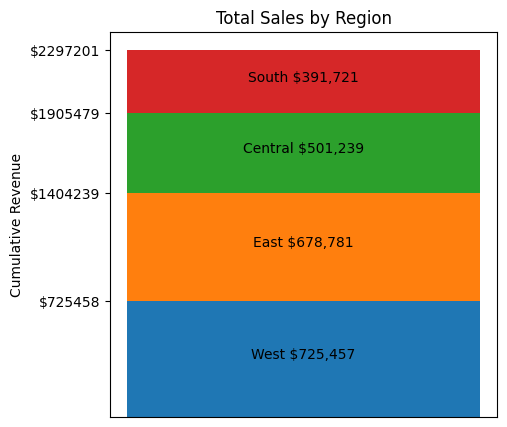

In [53]:
plt.figure(figsize = (5,5))
ax = plt.gca()
bottom = 0
count = 0
for region in top.index:
    ax.bar(1, top[region], label=region, bottom=bottom)
    bottom += top[region]
    ax.text(1,bottom-top[region]/2,f'{region} $'+ f'{int(top[region]):,d}', fontsize=10, horizontalalignment='center')
    count += 1
ax.set_title("Total Sales by Region")
ax.set_xlabel('')
ax.yaxis.set_major_formatter('${x:1.0f}')
ax.set_ylabel('Cumulative Revenue')
ax.set_xticks([])
ax.set_yticks(np.cumsum(list(top)));

In [54]:
top = pd.DataFrame(top)
total = top['Total'].sum()
top['Percentage'] = top['Total']/total*100
print(top.head())
print('All Sales Revenue',f'${round(total,-1):1,.0f}')

             Total  Percentage
Region                        
West     725457.93   31.580080
East     678781.36   29.548191
Central  501239.88   21.819591
South    391721.90   17.052138
All Sales Revenue $2,297,200


**Revnue By Product Category**

In [55]:
cat = 'Category'
byyear = data[[cat,'Sales','Order Year']].groupby(['Order Year',cat]).sum().sort_values(['Order Year','Sales'], ascending=[True,False])
byyear.rename(columns={'Sales':'Total Sales'})
byyear = byyear.swaplevel().unstack()
byyear.columns = byyear.columns.droplevel(0)
byyear['Total'] = byyear.apply('sum',axis=1)
byyear = byyear.sort_values(['Total'], ascending=False)
top = byyear['Total'].head(10)

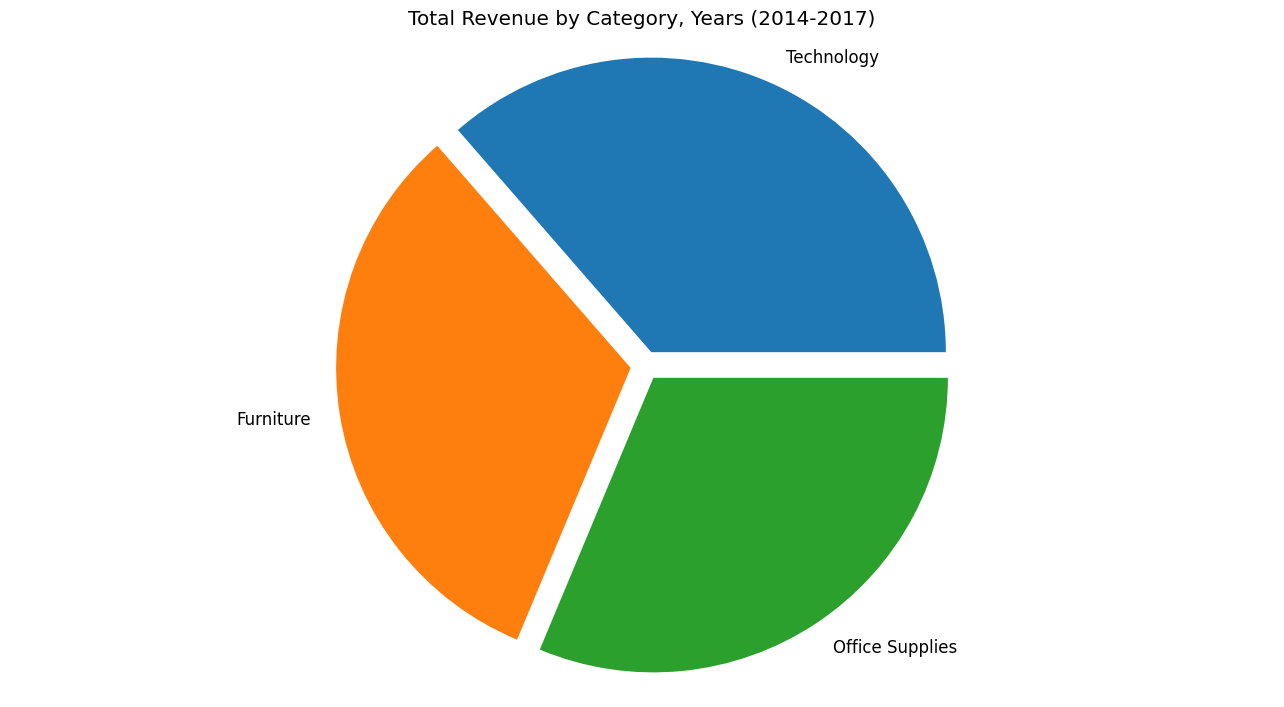

In [56]:
fig = plt.figure(figsize = (13,7))
ax1 = fig.gca()
plt.rcParams['font.size'] = 12.0
explode = len(top.index) * [0.05]
ax1.pie(top, labels=top.index, explode=explode)
ax1.axis('equal')
plt.tight_layout()
plt.title(f'Total Revenue by Category, Years ({min(years)}-{max(years)})')
plt.show();

In [57]:
top = pd.DataFrame(top)
total = top['Total'].sum()
top['Percentage'] = top['Total']/total*100
print(top.head())
print('All Sales Revenue',f'${round(total,-1):1,.0f}')

                     Total  Percentage
Category                              
Technology       836154.10   36.398821
Furniture        741999.98   32.300176
Office Supplies  719046.99   31.301004
All Sales Revenue $2,297,200


Of the total revenue over this period of time (2,297,200) the Technology category made of about 36.6%, with 836154.10 in revenue.

**Revenue By Sub-Category**

In [58]:
cat = 'Sub-Category'
byyear = data[[cat,'Sales','Order Year']].groupby(['Order Year',cat]).sum().sort_values(['Order Year','Sales'], ascending=[True,False])
byyear.rename(columns={'Sales':'Total Sales'})
byyear = byyear.swaplevel().unstack()
byyear.columns = byyear.columns.droplevel(0)
byyear['Total'] = byyear.apply('sum',axis=1)
byyear = byyear.sort_values(['Total'], ascending=False)
top = byyear['Total'].head(10)

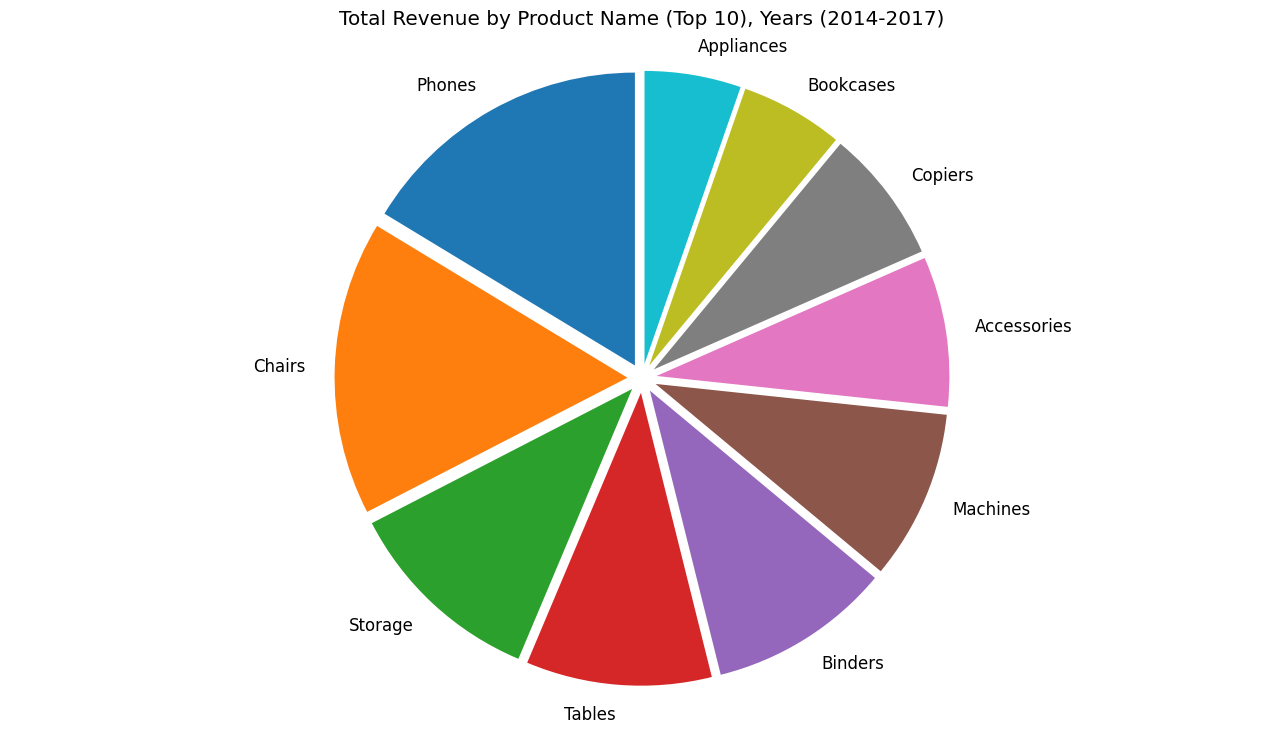

In [59]:
fig = plt.figure(figsize = (13,7))
ax1 = fig.gca()
plt.rcParams['font.size'] = 12.0
explode = len(top.index) * [0.05]
ax1.pie(top, labels=top.index, explode=explode, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.title(f'Total Revenue by Product Name (Top 10), Years ({min(years)}-{max(years)})', pad=20)
plt.show();

In [60]:
top = pd.DataFrame(top)
total = top['Total'].sum()
top['Percentage'] = top['Total']/total*100
print(top)
print('All Sales Revenue',f'${round(total,-1):1,.0f}')

                  Total  Percentage
Sub-Category                       
Phones        330007.10   16.326983
Chairs        328449.13   16.249903
Storage       223843.59   11.074582
Tables        206965.68   10.239553
Binders       203412.77   10.063774
Machines      189238.68    9.362516
Accessories   167380.31    8.281081
Copiers       149528.01    7.397845
Bookcases     114880.05    5.683649
Appliances    107532.14    5.320114
All Sales Revenue $2,021,240


Of the total revenue over this period of time for the top 10 product sub-categories ($2,021,240), sales of Phones made up about 16.3%, accounting for nearly 33k in revenue.

**Revenue By Product Name**

In [61]:
cat = 'Product Name'
byyear = data[[cat,'Sales','Order Year']].groupby(['Order Year',cat]).sum().sort_values(['Order Year','Sales'], ascending=[True,False])
byyear.rename(columns={'Sales':'Total Sales'})
byyear = byyear.swaplevel().unstack()
byyear.columns = byyear.columns.droplevel(0)
byyear['Total'] = byyear.apply('sum',axis=1)
byyear = byyear.sort_values(['Total'], ascending=False)
top = byyear['Total'].head(10)

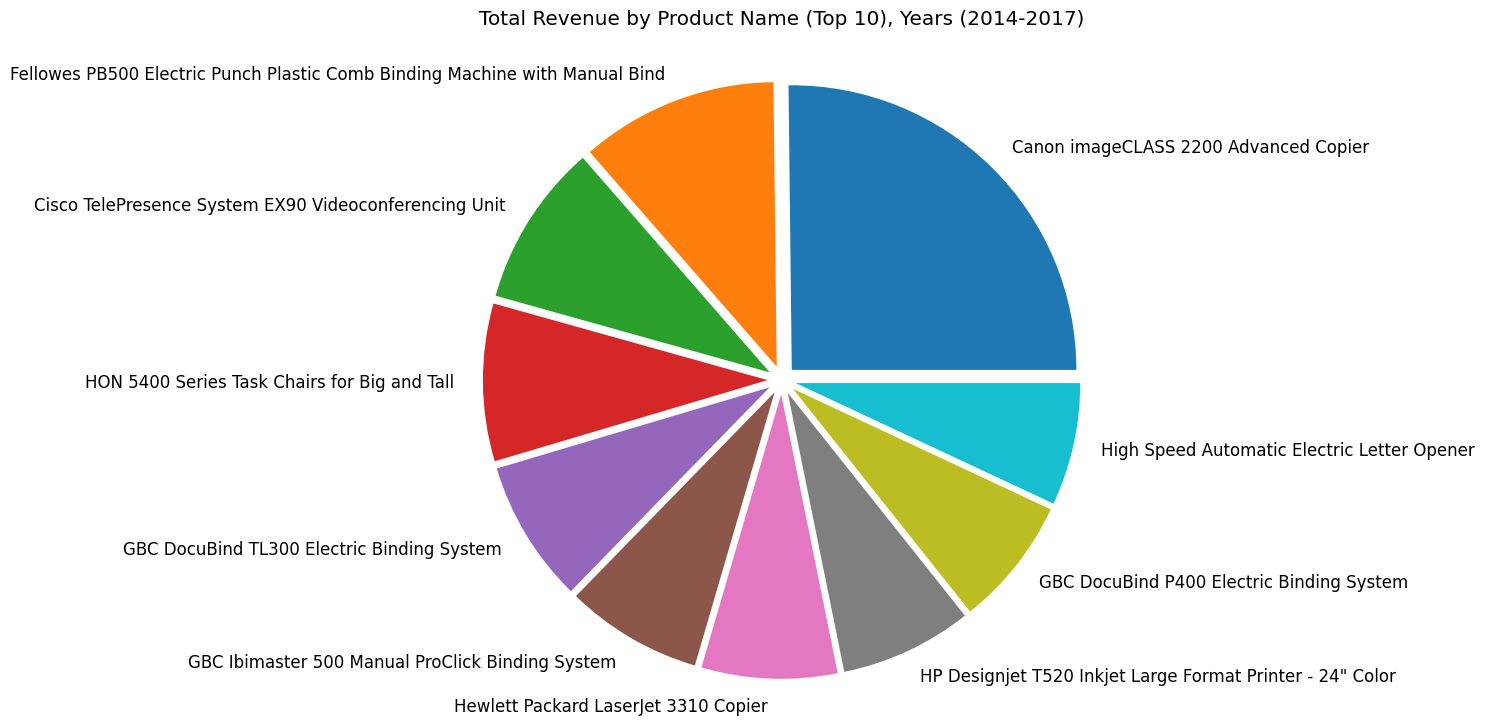

In [62]:
fig = plt.figure(figsize = (13,7))
ax1 = fig.gca()
plt.rcParams['font.size'] = 12.0
explode = len(top.index) * [0.05]
ax1.pie(top, labels=top.index, explode=explode)
ax1.axis('equal')
plt.tight_layout()
plt.title(f'Total Revenue by Product Name (Top 10), Years ({min(years)}-{max(years)})', pad=20)
plt.show();

In [63]:
top = pd.DataFrame(top)
total = top['Total'].sum()
top['Percentage'] = top['Total']/total*100
print(top)
print('All Sales Revenue',f'${round(total,-1):1,.0f}')

                                                       Total  Percentage
Product Name                                                            
Canon imageCLASS 2200 Advanced Copier               61599.83   25.181825
Fellowes PB500 Electric Punch Plastic Comb Bind...  27453.38   11.222859
Cisco TelePresence System EX90 Videoconferencin...  22638.48    9.254542
HON 5400 Series Task Chairs for Big and Tall        21870.57    8.940623
GBC DocuBind TL300 Electric Binding System          19823.48    8.103779
GBC Ibimaster 500 Manual ProClick Binding System    19024.50    7.777158
Hewlett Packard LaserJet 3310 Copier                18839.68    7.701604
HP Designjet T520 Inkjet Large Format Printer -...  18374.90    7.511604
GBC DocuBind P400 Electric Binding System           17965.07    7.344066
High Speed Automatic Electric Letter Opener         17030.31    6.961939
All Sales Revenue $244,620


Of the total revenue over this period of time for the top 10 products($244,620), sales of Canon imageCLASS 2200 Advanced Copier made up about 25.2%, accounting for nearly 61.6k in revenue.

**Feature Correlations**

Order Year      -0.009679
Order Month     -0.000625
Order Quarter   -0.002501
Row ID          -0.001359
Postal Code     -0.023854
Sales            1.000000
Quantity         0.200795
Profit           0.479064
Name: Sales, dtype: float64


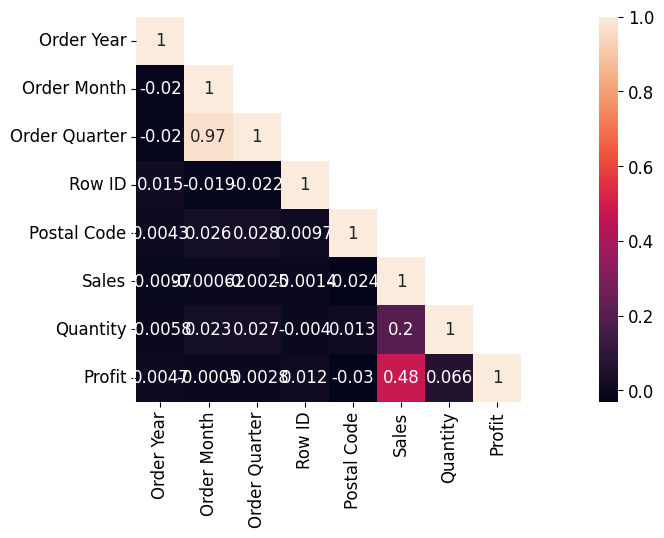

In [64]:
corr_matrix = data.select_dtypes(include=['float','int']).corr()
print(corr_matrix['Sales'])
mask = np.array(corr_matrix)
mask[np.tril_indices_from(mask)]=False
fig = plt.gcf()
fig.set_size_inches(20,5)
sns.heatmap(data=corr_matrix, mask=mask, square=True, annot=True);

Sales                  1.000000
Segment_Consumer      -0.010216
Segment_Corporate      0.004187
Segment_Home Office    0.008310
Name: Sales, dtype: float64


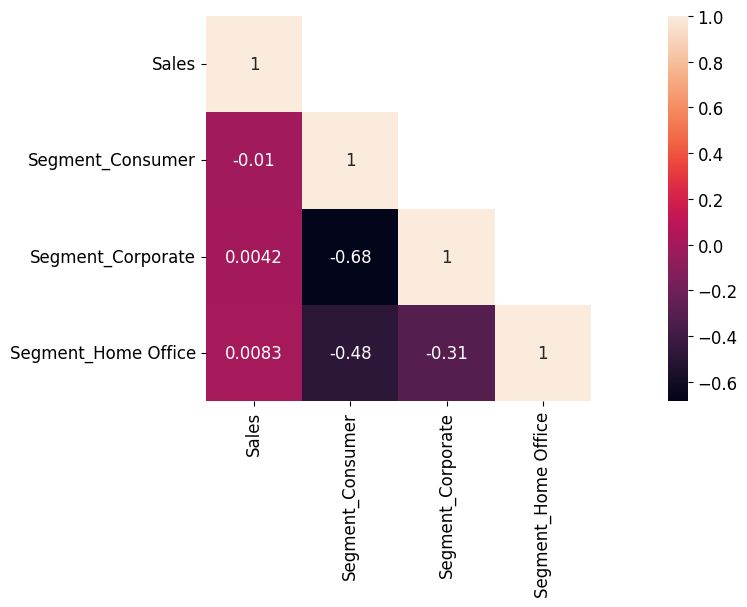

In [65]:
temp_df = data[['Segment','Sales']]
temp_df = pd.get_dummies(temp_df)
corr_matrix = temp_df.corr()
print(corr_matrix['Sales'])
mask = np.array(corr_matrix)
mask[np.tril_indices_from(mask)]=False
fig = plt.gcf()
fig.set_size_inches(20,5)
sns.heatmap(data=corr_matrix, mask=mask, square=True, annot=True);

Sales                       1.000000
Category_Furniture          0.099922
Category_Office Supplies   -0.218568
Category_Technology         0.170260
Name: Sales, dtype: float64


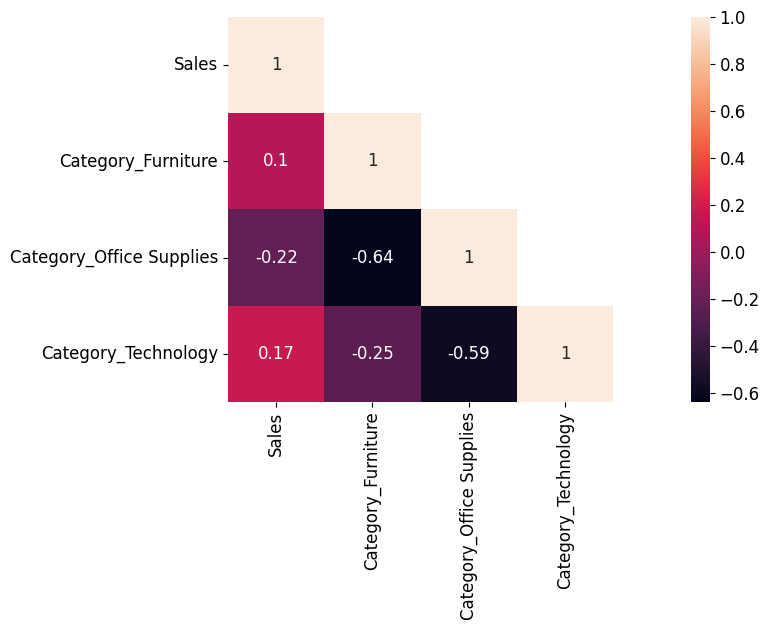

In [66]:
temp_df = data[['Category','Sales']]
temp_df = pd.get_dummies(temp_df)
corr_matrix = temp_df.corr()
print(corr_matrix['Sales'])
mask = np.array(corr_matrix)
mask[np.tril_indices_from(mask)]=False
fig = plt.gcf()
fig.set_size_inches(20,5)
sns.heatmap(data=corr_matrix, mask=mask, square=True, annot=True);

Sales                       1.000000
Sub-Category_Accessories   -0.006459
Sub-Category_Appliances     0.000319
Sub-Category_Art           -0.092419
Sub-Category_Binders       -0.065518
Sub-Category_Bookcases      0.067178
Sub-Category_Chairs         0.124498
Sub-Category_Copiers        0.261514
Sub-Category_Envelopes     -0.042752
Sub-Category_Fasteners     -0.051616
Sub-Category_Furnishings   -0.069987
Sub-Category_Labels        -0.061006
Sub-Category_Machines       0.245090
Sub-Category_Paper         -0.110368
Sub-Category_Phones         0.070873
Sub-Category_Storage        0.016948
Sub-Category_Supplies       0.003528
Sub-Category_Tables         0.122062
Name: Sales, dtype: float64


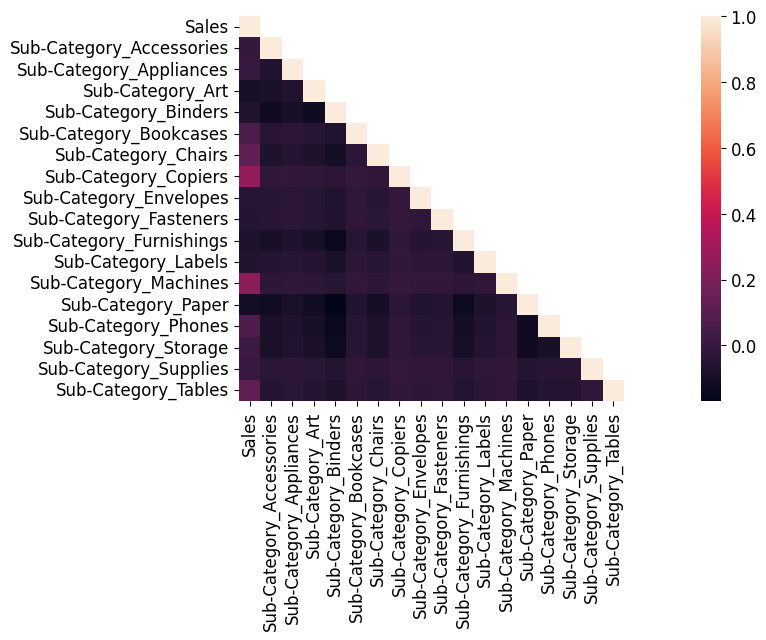

In [67]:
temp_df = data[['Sub-Category','Sales']]
temp_df = pd.get_dummies(temp_df)
corr_matrix = temp_df.corr()
print(corr_matrix['Sales'])
mask = np.array(corr_matrix)
mask[np.tril_indices_from(mask)]=False
fig = plt.gcf()
fig.set_size_inches(20,5)
sns.heatmap(data=corr_matrix, mask=mask, square=True, annot=False);

Again we see minimal correlation across the board, with a couple small blips for larger-ticket items, like copiers.

**Time Series Analysis**

We'll end the EDA here. We have a prepped dataframe with the data on which we can now turn our attention for Time-Series Analysis to see if we can make a prediction for future sales.